# Softmax Regression for MNIST

##### Ref : https://github.com/c1mone/Tensorflow-101/blob/master/notebooks/1_MNIST_Softmax_Regression.ipynb

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Users\pc\Anaconda3\envs\tf110\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### MNIST Dataset

In [3]:
# Download MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Train Image (55000, 784)
Train Label (55000, 10)
Validation Image (5000, 784)
Validation Label (5000, 10)
Test Image (10000, 784)
Test Label (10000, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


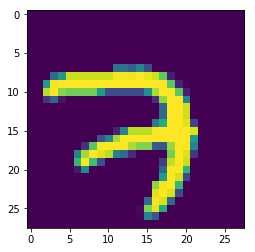

In [6]:
# Check MNIST data
print('Train Image', mnist.train.images.shape)   # 784 = 28 * 28
print('Train Label', mnist.train.labels.shape)   # One-hot type label
print('Validation Image', mnist.validation.images.shape)
print('Validation Label', mnist.validation.labels.shape)
print('Test Image', mnist.test.images.shape)
print('Test Label', mnist.test.labels.shape)

ind = 0
plt.imshow(np.reshape(mnist.train.images[0, ...], (28, 28)))
print(mnist.train.labels[0, :])

### Implement Softmax regresion (y = softmax(Wx+b))

In [7]:
# Placeholder for input data
x = tf.placeholder(tf.float32, [None, 784])

In [8]:
# Variable for trainable parameter
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [9]:
# Model
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [10]:
# Loss function (Cross-entropy)
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [11]:
# Optimizer
lr = 0.5
train_step = tf.train.GradientDescentOptimizer(lr).minimize(cross_entropy)

In [13]:
# Add node for evaluation
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [20]:
# Initialize 
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

In [21]:
# Train
epoch, batch = 10, 100

for i in range(epoch):
    batch_xs, batch_ys = mnist.train.next_batch(batch)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    print(i, sess.run(accuracy, feed_dict = {x: mnist.test.images, y_: mnist.test.labels}))

0 0.3338
1 0.4341
2 0.4773
3 0.6568
4 0.5417
5 0.7152
6 0.6928
7 0.6692
8 0.759
9 0.7663


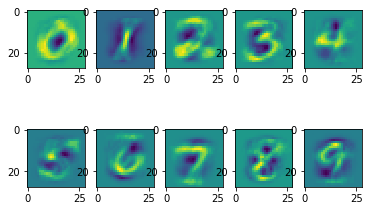

In [27]:
# Check learned feature
features = sess.run(W)

for ind in range(10):
    plt.subplot(2, 5, ind + 1)
    plt.imshow(np.reshape(features[:, ind], (28, 28)))